**Aprendizaje Automático** - 2024
# Clase 5: Clasificación

Temas que veremos en esta notebook:

- Clasificación binaria.
- Regresión logística y función sigmoidea
- Support Vector Machines
- K-Nearest Neighbours
- Métricas
- Clasificación multiclase

In [1]:
# Imports necesarios
import numpy as np
import pandas as pd
from sklearn.datasets import load_diabetes
from sklearn.linear_model import LinearRegression, Lasso, Ridge, LassoCV, RidgeCV, ElasticNet, ElasticNetCV
from sklearn.model_selection import train_test_split, KFold, StratifiedKFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, log_loss, confusion_matrix
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns

# Clasificación Binaria: Modelos

## Ejemplo: Dataset Breast Cancer Detection
Para la primer parte vamos a usar el dataset de [Detección de cancer de mama](https://www.kaggle.com/datasets/uciml/breast-cancer-wisconsin-data) compuesto de distintas fotos de tejido las cuales se clasifican como potencial cáncer. Para estas fotos se extraen las siguientes características:

    Descripción del dataset:

    Se calculan diez características de valor real para cada núcleo celular:

    * radio
    * textura
    * perímetro
    * área
    * suavidad
    * compacidad
    * concavidad
    * puntos cóncavos
    * simetría
    * dimensión fractal

    Se calculan el promedio, el error estándar y el "peor" o el más grande (promedio de los tres valores más grandes) de estas características para cada imagen, lo que resulta en 30 características.

In [2]:
from sklearn.datasets import load_breast_cancer

# cargar el conjunto de datos
data = load_breast_cancer()

# dividir los datos en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(data.data, data.target, test_size=0.2, random_state=42)

In [3]:
X_train.shape

(455, 30)

## Regresión logística

La [regresión logística](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html#sklearn.linear_model.LogisticRegression) es una técnica de aprendizaje supervisado utilizada para predecir la probabilidad de una variable categórica binaria en función de una o más variables predictoras. En scikit-learn, se puede utilizar la clase `LogisticRegression` para construir modelos de regresión logística.

La RG puede verse como una regresión lineal compuesta con una función conocida como **función sigmoidea**. La función sigmoidea se utiliza para transformar la variable dependiente en un rango entre 0 y 1, se define como:

$ \sigma (z) = \frac{1}{1+e^{-z}} $

![](https://upload.wikimedia.org/wikipedia/commons/thumb/8/88/Logistic-curve.svg/600px-Logistic-curve.svg.png)

donde $z$ es la entrada que en la regresion logística es en realidad una regresión lineal:

$z = \beta_0 + \beta_1x_1 + \beta_2x_2 + ... + \beta_px_p$

quedando el modelo $f$ para un dato $x$:

\begin{equation}
f(x) = \sigma(\beta_0 + \sum_{j=1}^p \beta_j x_j) = \frac{1}{1+e^{-(\beta_0 + \sum_{j=1}^p \beta_j x_j)}}
\end{equation}

En el caso de clasificación binaria se interpreta como la probabilidad de la etiqueta correspondiente a los features $x$ de pertenecer a la clase de interés o clase positiva (por ej: si un tipo de cancer es maligno) o de pertenecer a la clase negativa ($\mathcal{C}_P$ o $\mathcal{C}_N$). Volvemos a usar $y$ para la clase de $x$ y la predicción del modelo será $\hat{y}$:

$$
\hat{y} = \max \{ P(y\in \mathcal{C}_P|x), P(y\in \mathcal{C}_N|x) \}
$$

Pero esto se puede reescribir como:

$$
\hat{y} = \max \{ P(y\in \mathcal{C}_P|x),1 - P(y\in \mathcal{C}_P|x) \}
$$

Nuestro modelo $f$ justamente predecirá esto:$f(x) = P(y\in \mathcal{C}_P|x)$, quedando

$$
\hat{y}=  \max \{ f(x), 1 - f(x) \}
$$

por lo tanto si la predicción es mayor a $0.5$ se predice clase positiva y sino clase negativa.

In [4]:
from sklearn.linear_model import LogisticRegression

# Generamos los puntos al azar
np.random.seed(42)
low_x =-2
high_x = 4
print('Creando una distribución de datos...')

#crea una distribución uniforme
X = np.random.uniform(low=low_x, high=high_x, size=(100,1))
#La función numpy.where acepta como argumentos de entrada una condición y dos estructuras tipo array, x e y, y devuelve valores de x o de y en función de que se cumpla o no la condición: Si se cumple, se devuelve el valor de x. Si no se cumple, el de y.
a = np.random.binomial(1, 0.9, size=(100,1))
b = np.random.binomial(1, 0.1, size=(100,1))
y = np.where(X<0, a, b)

# Instanciamos el modelo
print('Ajustando una regresión logística...')
lr = LogisticRegression()
# La función numpy.ravel() devuelve un array 1D con todos los elementos del array de entrada y con el mismo tipo
# Ajustamos una regresión logística a los datos
lr.fit(X, y.ravel())

# Creamos una cuadrícula de valores de x para hacer predicciones
x_grid, y_grid = np.meshgrid(np.linspace(low_x, high_x, 100), np.linspace(-0.1, 1.1, 100))
X_test_ = x_grid.ravel().reshape(-1,1)

# Creamos el rango de valores de x para la recta de decisión (se podria extrar de x_grid)
x_range = np.linspace(low_x, high_x, 100)

# Hacemos predicciones en la cuadrícula de valores de x
z_proba = lr.predict_proba(X_test_)[:,1]
z_predict = lr.predict(X_test_)

# Hacemos predicciones en la cuadrícula de valores de x
y_proba = lr.predict_proba(x_range.reshape(-1,1))[:, 1]

# Calculamos la predicción del modelo para cada punto en el rango de valores de x
y_decision = lr.predict(x_range.reshape(-1, 1))

print(f"La función para tomar la decisión es: f(x) = 1/(1 + exp(-({lr.intercept_[0]:0.2f}+{lr.coef_[0][0]:0.2f}*X)))")



Creando una distribución de datos...
Ajustando una regresión logística...
La función para tomar la decisión es: f(x) = 1/(1 + exp(-(0.46+-1.45*X)))


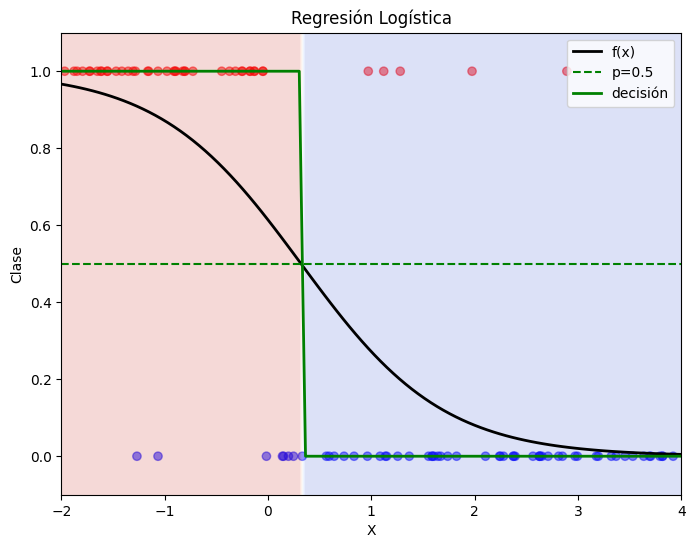

In [5]:
# Creamos el gráfico
fig, ax = plt.subplots(figsize=(8,6))
plt.scatter(X, y, color=['red' if i==1 else 'blue' for i in y], alpha=0.5)
plt.plot(x_range, y_proba, color='black', linewidth=2, label='f(x)')
plt.axhline(y=0.5, color='green', linestyle='--', label='p=0.5')
ax.contourf(x_grid, y_grid, z_predict.reshape(x_grid.shape), alpha=0.2, cmap='coolwarm')
plt.plot(x_range, y_decision, color='green', linewidth=2, label='decisión')
plt.xlabel('X')
plt.ylabel('Clase')
plt.title('Regresión Logística')
plt.legend()
plt.show()

Vamos a tratar de entrenar uno en nuestro dataset de Breast Cancer.

In [6]:
from sklearn.linear_model import LogisticRegression

# crear el modelo de regresión logística
model = LogisticRegression(penalty=None, max_iter=100000)

# entrenar el modelo con los datos de entrenamiento
model.fit(X_train, y_train)

# hacer predicciones con los datos de prueba
y_pred = model.predict(X_test)

# calcular la precisión de la clasificación
accuracy = accuracy_score(y_test, y_pred)

print("Accuracy de la clasificación: {:.2f}%".format(accuracy * 100))

Accuracy de la clasificación: 97.37%


In [7]:
model.intercept_

array([45.7637218])

In [8]:
model.coef_

array([[ 1.43348416e+00, -1.27161991e-01,  5.51728822e-01,
        -4.71746190e-02, -2.58168260e+01,  2.36296376e+01,
        -3.61111267e+01, -6.39297970e+01,  2.51075701e+01,
         4.35660955e+00, -5.35015159e+00,  3.03139756e+00,
         6.52308457e-01, -3.34504343e-01, -1.15370633e+01,
         5.16992505e+01,  7.60045022e+01, -5.04549353e+00,
         1.88206373e+01,  9.35354501e+00, -3.31225893e+00,
        -6.74007978e-01,  2.23771922e-02,  1.79785626e-02,
        -6.45360189e+01,  1.42911928e+01, -1.90024344e+01,
        -7.41183095e+01, -2.81678615e+01,  1.09657031e+01]])

In [9]:
model.coef_.shape

(1, 30)

**Mini Ejercicio**

¿Qué hiperparámetros tiene este modelo? Revisar la documentación.

In [10]:
model.get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100000,
 'multi_class': 'deprecated',
 'n_jobs': None,
 'penalty': None,
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

### Función de Pérdida y Cross-Entropy

La **función de pérdida** es la función $J$ que depende de los parámetros de nuestro modelo ($\theta$) y mide la distancia de las predicciones de nuestro modelo a los datos reales y que nos permite optimizar los parametros. En el caso de la regresión logística la función de pérdida que se utiliza es la función de **entropía cruzada (cross-entropy)**, que se define como:

$ J(\theta) = -\frac{1}{N} \sum_{i=1}^{N} y^{(i)} \log(h_\theta(x^{(i)})) + (1 - y^{(i)}) \log(1 - h_\theta(x^{(i)})) $

donde $N$ es el número de ejemplos de entrenamiento, $y^{(i)}$ es la variable categórica binaria verdadera, $x^{(i)}$ es el vector de características del ejemplo $i$, y $h_\theta(x^{(i)})$ es la predicción del modelo para la observación $i$.

Para el caso binario, se puede definir una implementación:




```
import numpy as np

def BinaryCrossEntropy(y_true, y_pred):
  return -(y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred)).mean()
```



También se la conoce como `log_loss` como en [sklearn](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.log_loss.html#sklearn.metrics.log_loss) y puede ser usada en el caso multiclase.

 Veamos la aplicación de esta función costo como métrica al caso de Regresión Logística sobre el Dataset Breast Cancer


In [11]:
from sklearn.metrics import log_loss

y_pred_prob = model.predict_proba(X_test)[:, 1]  # Obtener vector de probabilidades

loss = log_loss(y_test, y_pred_prob)

print('Log loss:', loss)

Log loss: 0.060257172877511575


In [12]:
def BinaryCrossEntropy(y_true, y_pred):

  return -np.mean(y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred))

print(BinaryCrossEntropy(y_test, y_pred_prob))

0.06025717287751155


## Support Vector Machines (SVM)

Los modelos de SVM (**Máquinas de Vectores de Soporte**) son un conjunto de algoritmos de aprendizaje supervisado utilizados para la clasificación y regresión. El modelo de SVM se basa en la idea de encontrar el hiperplano que mejor separa los datos de diferentes clases. Este hiperplano es definido por un conjunto de vectores de soporte, que son los puntos más cercanos a la frontera de decisión.

![](https://upload.wikimedia.org/wikipedia/commons/thumb/7/72/SVM_margin.png/300px-SVM_margin.png)

El modelo de SVM se puede representar matemáticamente de la siguiente manera:

Para el caso de clasificación binaria, el objetivo es encontrar el hiperplano que mejor separa los datos de dos clases. Dado un conjunto de entrenamiento ${(\mathbf{x}_1, y_1),...,(\mathbf{x}_m, y_m)}$, donde $\mathbf{x}_i \in \mathbb{R}^n$ es el vector de características del $i$-ésimo ejemplo y $y_i \in {-1, 1}$ es su correspondiente etiqueta de clase, el hiperplano que mejor separa los datos se puede encontrar resolviendo el siguiente problema de optimización:

$\min_{\mathbf{w}, b} \frac{1}{2}||\mathbf{w}||^2$

sujeto a $y_i(\mathbf{w} \cdot \mathbf{x}_i + b) \geq 1$ para todo $i=1,...,m$

La función objetivo es una medida de la complejidad del modelo, mientras que las restricciones aseguran que el hiperplano separa los datos de las dos clases de manera correcta. Podemos usar su implementación [SVC](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html) de la librería scikit-learn para implementar SVM.

In [13]:
from sklearn.svm import SVC

# crear el modelo SVM
model = SVC(kernel='linear', C=1, random_state=42)

# entrenar el modelo con los datos de entrenamiento
model.fit(X_train, y_train)

# hacer predicciones con los datos de prueba
y_pred = model.predict(X_test)

# calcular la precisión de la clasificación
accuracy = accuracy_score(y_test, y_pred)

print("Accuracy de la clasificación: {:.2f}%".format(accuracy * 100))

Accuracy de la clasificación: 95.61%


## K-Vecinos más Cercanos (KNN)

El modelo de **K-Nearest Neighbors (KNN)** es un algoritmo de aprendizaje supervisado utilizado para clasificación y regresión. La idea principal del KNN es encontrar las $k$ observaciones más cercanas a la observación de prueba en el espacio de características y utilizar su etiqueta para predecir la clase de la observación de prueba. La distancia entre las observaciones se calcula utilizando una métrica de distancia, como la distancia Euclidiana o la distancia Manhattan.

---
*Nota:*
La ecuación para la distancia Euclidiana entre dos vectores de observaciones $x$ y $y$ es: $d(x, y) = \sqrt{\sum_{i=1}^{n} (x_i - y_i)^2}$, también conocida como norma o distancia $L^2$.

---

Para predecir la clase $\hat{y}^*$ de una observación $x^*$, se utiliza el voto mayoritario de las $k$ observaciones más cercanas a la observación de prueba $x^*$ dentro del conjunto de entrenamiento. La ecuación para la clasificación de KNN es:

$\hat{y}^* = \underset{c}{\operatorname{argmax}}\sum_{i=1}^{k}w_{i}\cdot I(y_{i}=c)$

donde $c$ es una de las posibles clases, $w_i$ es el peso asignado a la $i$-ésima observación cercana (tipicamente 1 o 1/distancia) e $I(y_i = c)$ es una función indicadora que toma el valor 1 si la etiqueta de la $i$-ésima observación cercana es igual a $c$ y 0 en caso contrario.

Para implementar [KNN](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html#sklearn.neighbors.KNeighborsClassifier) en Python utilizando la librería scikit-learn, podemos utilizar la clase `KNeighborsClassifier`.

In [15]:
from sklearn.neighbors import KNeighborsClassifier

# crear el modelo de KNN con k=5
model = KNeighborsClassifier(n_neighbors=5)

# entrenar el modelo con los datos de entrenamiento
model.fit(X_train, y_train)

# hacer predicciones con los datos de prueba
y_pred = model.predict(X_test)

# calcular la precisión de la clasificación
accuracy = accuracy_score(y_test, y_pred)

print("Accuracy de la clasificación: {:.2f}%".format(accuracy * 100))

Accuracy de la clasificación: 95.61%


Text(0, 0.5, 'accuracy_score')

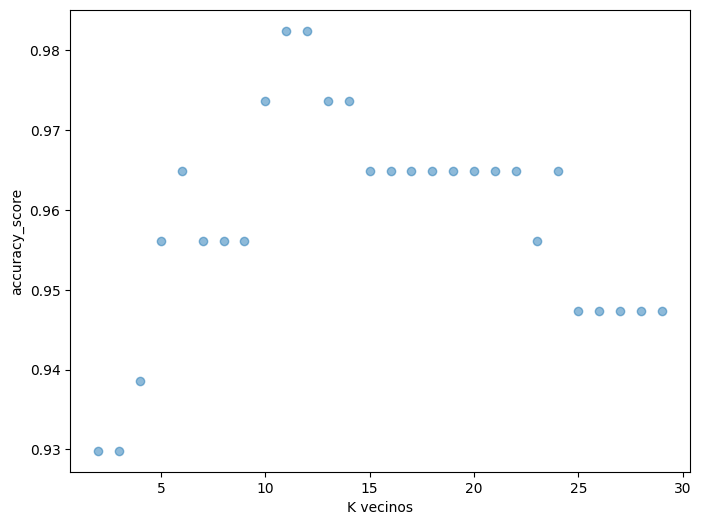

In [16]:
x = range(2,30)
y = []
for i in x:
  model = KNeighborsClassifier(n_neighbors=i)
  model.fit(X_train, y_train)
  y_pred = model.predict(X_test)
  y.append(accuracy_score(y_test, y_pred))

fig, ax = plt.subplots(figsize=(8,6))
plt.scatter(x, y, alpha=0.5)
plt.xlabel('K vecinos')
plt.ylabel('accuracy_score')

# Métricas

Estuvimos viendo como calcular la performance de nuestro modelo a mano, pero scikit-learn nos provee ya un [módulo](https://scikit-learn.org/stable/api/sklearn.metrics.html#classification-metrics) completo con implementación de muchas métricas para clasificación (y muchos otros problemas). Veamos como calcular algunas como la matriz de confusión o el `f1-score`.

## Matriz de confusión

Recordemos como es la [matriz de confusión CM](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html), donde
 
$$CM_{i,j} = \text{número de observables en el grupo i que fueron detectados en el grupo j}$$

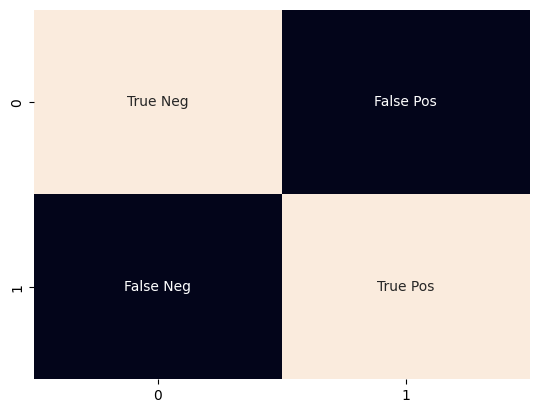

In [17]:
#@title  Matriz de confusion en el caso binario
labels = ['True Neg','False Pos','False Neg','True Pos']
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(np.array([[1,0],[0,1]]), annot=labels, fmt='', cbar=False);

In [18]:
from sklearn.metrics import confusion_matrix
C = confusion_matrix(y_test, y_pred)
print('Confusion matrix:')
print(C)

Confusion matrix:
[[37  6]
 [ 0 71]]


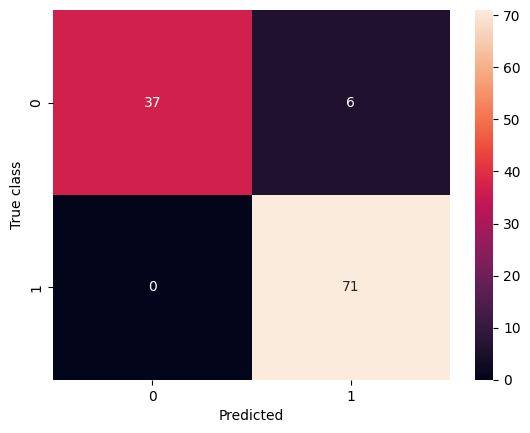

In [19]:
# Con seaborn podemos verla asi
s= sns.heatmap(C, annot=True)
s.set(xlabel='Predicted', ylabel='True class');

## F-Score


### F1 (caso binario)
Por otro lado, el [F-Score](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.f1_score.html#sklearn.metrics.f1_score) en el caso binario se define como

$$F1 = 2 * (precision * recall) / (precision + recall)
$$

El valor más alto posible de un puntaje F1 es 1, lo que indica un precision y recall perfectos, y el valor más bajo posible es 0, si el precision o el recall son cero.




In [20]:
# f1_score nos devuelve la metrica para cada posible elección de clase positiva
from sklearn.metrics import f1_score
f1_score(y_test, y_pred, average=None)

array([0.925     , 0.95945946])

Una pequeña observación es que no es tan sencillo calcular metricas en el caso multiclase. En este caso tendremos tantos valores de precision y recall como clases tengamos, por lo tanto podremos calcular f1 de [distintas maneras](https://towardsdatascience.com/micro-macro-weighted-averages-of-f1-score-clearly-explained-b603420b292f). Según como querramos agruparlos tenemos distintas versiones de la métrica.

## Clasification Report

[`Classification Report`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html) es una herramienta de scikit-learn que nos permite ver muchas de las métricas de clasificación que vimos.

In [21]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.86      0.93        43
           1       0.92      1.00      0.96        71

    accuracy                           0.95       114
   macro avg       0.96      0.93      0.94       114
weighted avg       0.95      0.95      0.95       114



---
# Clasificación Multiclase

La clasificación puede separarse en:

**Clasificación binaria**

Cuando solo hay dos categorías para clasificar puntos de datos, se conoce como clasificación binaria. Por ejemplo, detectar si un paciente tiene tuberculosis (1) o no la tiene (0), o clasificar si una crítica de cine es positiva (1) o negativa (0).

**Clasificación multiclase**

Cuando el número de clases es mayor que dos, se conoce como clasificación multiclase. Por ejemplo, si tenemos que identificar el dígito en una imagen y clasificarlo en cualquier valor entre 0 y 9. En este caso, tenemos 10 clases. También podemos tener que calificar canciones entre 1 y 5 en base a su popularidad. En estos casos, cada punto de datos se asigna a una única etiqueta de clase.

**Clasificación multi-etiqueta**

Una sola entrada de datos puede tenes varias etiquetas asociadas. Por ejemplo, en la detección de objetos en imágenes, una imagen puede tener una casa y una planta. Esto se llama clasificación multi-etiqueta. **No trabajaremos este tipo de problemas en la materia.**

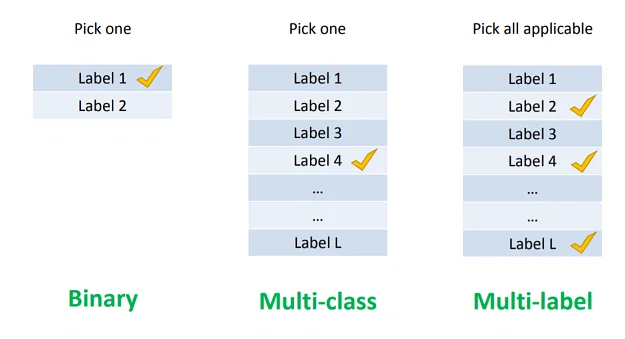

Los algoritmos utilizados para la clasificación multiclase se pueden categorizar principalmente en las siguientes categorías:

* Clasificador nativo de múltiples clases (Ej: Naive Bayes, KNN, Árboles)

* Transformación binaria (Lo veremos a continuación)

* Clasificación jerárquica (No lo veremos en la materia)

**Transformación binaria**

Existen algoritmos diseñados solo para tareas de clasificación binaria como la regresión logística y las máquinas de vectores de soporte (SVM). En el caso de multiclase, la tarea se divide en múltiples problemas de clasificación binaria utilizando principalmente dos estrategias:
* uno contra todos (one-vs-rest)
* uno contra uno (one-vs-one)


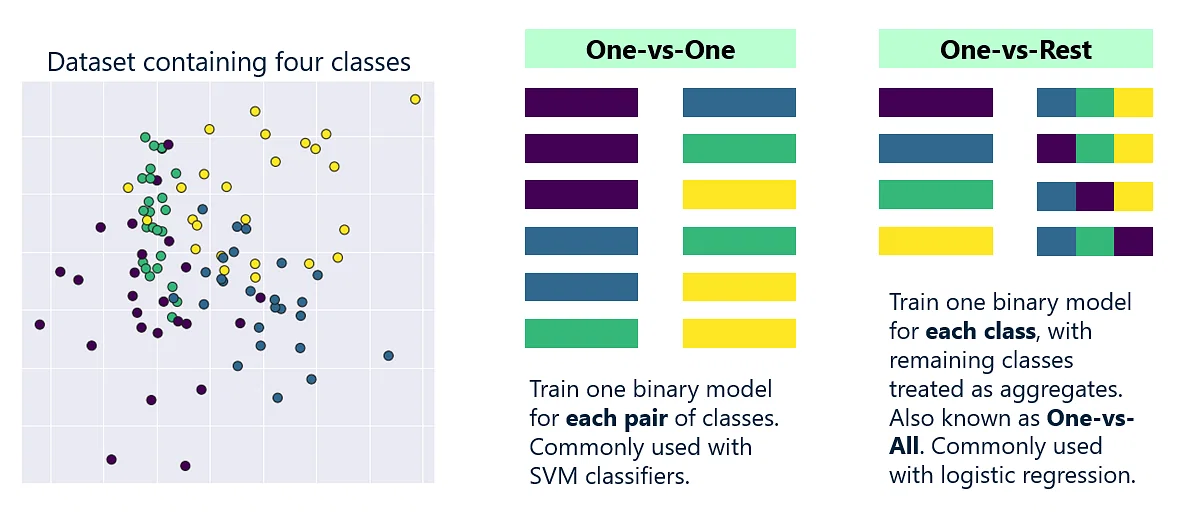

**Uno contra el resto (One-vs-Rest)**

Como su nombre indica, se entrena un clasificador binario para cada clase, donde la distribución de clases es la clase objetivo frente al resto de las clases.

Por ejemplo, si se está trabajando en un problema para predecir si la fruta dada es una manzana, pera o banana, se entrenarán tres clasificadores binarios.

* Clasificador A: [manzana] frente a [pera, banana]

* Clasificador B: [pera] frente a [manzana, bana]

* Clasificador C: [banana] frente a [manzana, pera]

Se utiliza el voto para predecir la clase final, es decir, el clasificador binario que predice la clase objetivo con la mayor confianza se da como salida final y se utiliza comúnmente con la regresión logística.

**Uno contra uno (One-vs-One)**

En este enfoque, se entrena un clasificador binario para cada par de clases, es decir, una clase frente a cada otra clase. El número de clasificadores binarios que se deben entrenar se puede calcular con la ayuda de esta fórmula sencilla:

(N * (N-1))/2 donde N = número total de clases

Por ejemplo, tomando el modelo anterior, los clasificadores totales que se deben entrenar son tres, que son los siguientes:

* Clasificador A: manzana frente a pera

* Clasificador B: manzana frente a banana

* Clasificador C: pera frente a banana

Cada clasificador binario predice una clase, y la clase predicha por la mayoría de los clasificadores se da como predicción final de clase. Esta estrategia funciona mejor para SVM u otros algoritmos basados en núcleos.

Probemos utilizar la regresión logística en una variable contra el resto.

c:\Users\Federico\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


Accuracy: 0.9333333333333333


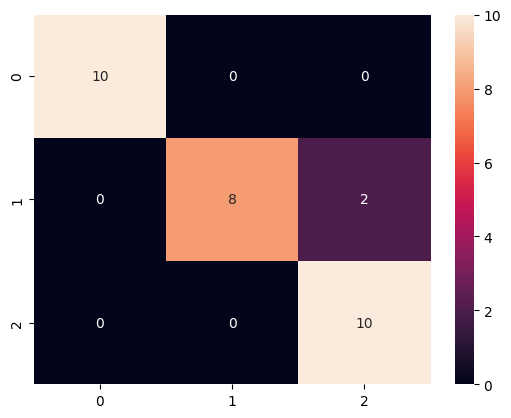

In [22]:
# importando las bibliotecas necesarias
import numpy as np
from sklearn import datasets
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split

# cargando el conjunto de datos de iris que es un dataset multiclase
iris = datasets.load_iris()

# X -> atributos, y -> etiquetas
X = iris.data
y = iris.target

# dividiendo X, y en datos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42, train_size=0.8, test_size=0.2, stratify=y)

# usar regresión logística para la clasificación
classifier = LogisticRegression(multi_class = "ovr")

# ajustar el modelo para los datos de entrenamiento
classifier.fit(X_train, y_train)
# predecir la variable y para los datos de testeo
prediction_y = classifier.predict(X_test)

# comprobar la precisión del modelo
print("Accuracy:", end=' ')
print(np.sum(prediction_y == y_test) / float(len(y_test)))

# creando una matriz de confusión
cm = confusion_matrix(y_test, prediction_y)
sns.heatmap(cm, annot=True);

## OneVsRest Classifier
En este caso se entrenarán N clasificadores binarios, uno para cada clase. Durante la predicción, cada uno de los clasificadores binarios vota por la clase que está intentando discriminar y la clase que recibe la mayoría de votos es la que se predice como la clase final.

Accuracy: 0.9333333333333333


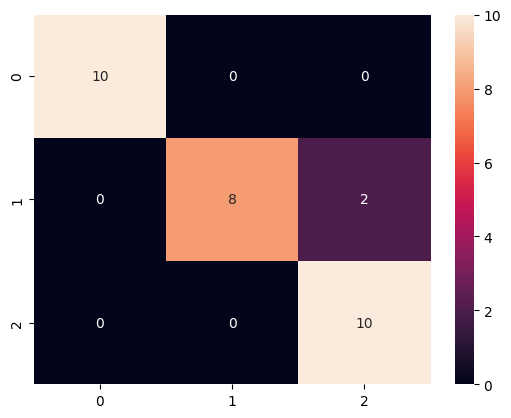

In [23]:
from sklearn.multiclass import OneVsRestClassifier

classifier = OneVsRestClassifier(LogisticRegression())
classifier.fit(X_train, y_train)
prediction_y = classifier.predict(X_test)

# comprobar la precisión del modelo
print("Accuracy:", end=' ')
print(np.sum(prediction_y == y_test) / float(len(y_test)))

# creando una matriz de confusión
cm = confusion_matrix(y_test, prediction_y)
sns.heatmap(cm, annot=True);

## OneVsOne Classifier
En este caso si tenemos un problema de clasificación multiclase con N clases, se entrenarán $N(N-1)/2$ clasificadores binarios. Durante la predicción, cada uno de los clasificadores binarios vota por una de las dos clases que está intentando discriminar y la clase que recibe la mayoría de votos es la que se predice como la clase final.

Accuracy: 0.9666666666666667


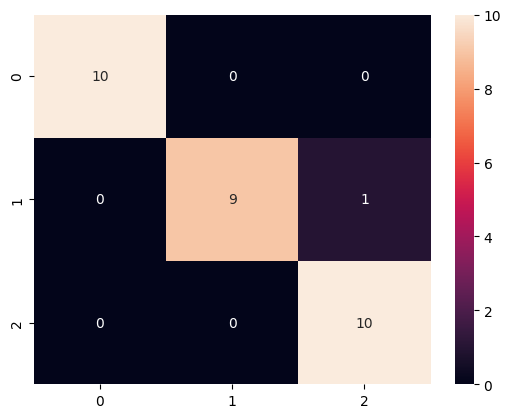

In [24]:
from sklearn.multiclass import OneVsOneClassifier

classifier = OneVsOneClassifier(LogisticRegression())
classifier.fit(X_train, y_train)
prediction_y = classifier.predict(X_test)

# comprobar la precisión del modelo
print("Accuracy:", end=' ')
print(np.sum(prediction_y == y_test) / float(len(y_test)))

# creando una matriz de confusión
cm = confusion_matrix(y_test, prediction_y)
sns.heatmap(cm, annot=True);

---
# Preguntas

Responda las siguientes preguntas para cada uno de los modelos vistos hoy utilizando el material visto en clase y recurriendo a la documentación de los modelos en scikit-learn:

* ¿El modelo se puede utilizar para ambos problemas: clasificación binario y multiclase?
* ¿El modelo implementa algún método o hiperparámetro para trabajar con el desbalance de clases?
* ¿El modelo implementa algún método o hiperparámetro al cuál la documentación se refiera como "*regularización*"?




## 1. ¿El modelo se puede utilizar para ambos problemas: clasificación binario y multiclase?
* **Regresión Logística (LogisticRegression)**
Sí. Por defecto, la regresión logística en scikit-learn es para clasificación binaria, pero puede manejar problemas multiclase usando los esquemas one-vs-rest (OvR, por defecto) o multinomial (softmax) con el parámetro multi_class.
* **SVM (SVC, LinearSVC)**
Sí. Los clasificadores SVM en scikit-learn soportan clasificación binaria y multiclase. Para multiclase, scikit-learn implementa automáticamente estrategias como one-vs-rest o one-vs-one.
* **KNN (KNeighborsClassifier)**
Sí. KNN puede utilizarse tanto para clasificación binaria como multiclase sin cambios en la configuración.

## 2.¿El modelo implementa algún método o hiperparámetro para trabajar con el desbalance de clases?
* **Regresión Logística**
Sí. El hiperparámetro class_weight permite asignar pesos a las clases para compensar el desbalance. Puede ser un diccionario o el valor 'balanced', que ajusta automáticamente los pesos inversamente proporcional a la frecuencia de las clases.
* **SVM**
Sí. Tanto SVC como LinearSVC tienen el hiperparámetro class_weight, igual que la regresión logística.
* **KNN**
No directamente. KNeighborsClassifier no tiene un parámetro específico para el desbalance de clases. Sin embargo, se puede mitigar el desbalance usando el parámetro weights='distance', que pondera el voto de los vecinos según la distancia, aunque esto no es lo mismo que ajustar por desbalance de clases.

## 3.¿El modelo implementa algún método o hiperparámetro al cuál la documentación se refiera como "regularización"?
* **Regresión Logística**
Sí. El hiperparámetro C controla la regularización (inversa de la fuerza de regularización). Además, el parámetro penalty permite elegir el tipo de regularización (l1, l2, elasticnet, none).
* **SVM**
Sí. El hiperparámetro C también controla la regularización en SVM. En LinearSVC y SVC, un valor bajo de C implica mayor regularización.
* **KNN**
No. KNN no tiene un parámetro de regularización en el sentido tradicional. La complejidad del modelo se controla principalmente con el número de vecinos (n_neighbors), pero esto no es regularización como tal.

# Ejercicio Integrador

Consideremos el [dataset](https://archive.ics.uci.edu/dataset/545/rice+cammeo+and+osmancik
) de clasificación de tipo de arroz en base a características morfológicas extraidas de imagenes. Descargar el dataset y seguir los siguientes pasos para desarrollar un modelo de clasificación

In [27]:
# Dataset descargado localmente desde: https://archive.ics.uci.edu/static/public/545/rice+cammeo+and+osmancik.zip

import urllib.request
import zipfile
import os

# Descargar el dataset si no existe
dataset_url = "https://archive.ics.uci.edu/static/public/545/rice+cammeo+and+osmancik.zip"
zip_filename = "rice+cammeo+and+osmancik.zip"

if not os.path.exists("Rice_Cammeo_Osmancik.arff"):
    print("Descargando dataset...")
    urllib.request.urlretrieve(dataset_url, zip_filename)
    
    print("Extrayendo archivos...")
    with zipfile.ZipFile(zip_filename, 'r') as zip_ref:
        zip_ref.extractall()
    
    print("Dataset descargado y extraído exitosamente.")
else:
    print("Dataset ya existe localmente.")

Descargando dataset...
Extrayendo archivos...
Dataset descargado y extraído exitosamente.


In [29]:
import pandas as pd
from scipy.io import arff
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import f1_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
arff_file = arff.loadarff('Rice_Cammeo_Osmancik.arff')
df = pd.DataFrame(arff_file[0])

In [31]:
df

,Area,Perimeter,Major_Axis_Length,Minor_Axis_Length,Eccentricity,Convex_Area,Extent,Class
0,15231.0,525.578979,229.749878,85.093788,0.928882,15617.0,0.572896,b'Cammeo'
1,14656.0,494.311005,206.020065,91.730972,0.895405,15072.0,0.615436,b'Cammeo'
2,14634.0,501.122009,214.106781,87.768288,0.912118,14954.0,0.693259,b'Cammeo'
3,13176.0,458.342987,193.337387,87.448395,0.891861,13368.0,0.640669,b'Cammeo'
4,14688.0,507.166992,211.743378,89.312454,0.906691,15262.0,0.646024,b'Cammeo'
...,...,...,...,...,...,...,...,...
3805,11441.0,415.858002,170.486771,85.756592,0.864280,11628.0,0.681012,b'Osmancik'
3806,11625.0,421.390015,167.714798,89.462570,0.845850,11904.0,0.694279,b'Osmancik'
3807,12437.0,442.498993,183.572922,86.801979,0.881144,12645.0,0.626739,b'Osmancik'
3808,9882.0,392.296997,161.193985,78.210480,0.874406,10097.0,0.659064,b'Osmancik'


1) Utilizar [LabelEncoder](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html) para transformar los valores de las etiquetas y separar los datos aleatoriamente en 2 conjuntos: entrenamiento y evaluación utilizando las proporciones fernet-cola rebajado (80-20). Se puede utilizar la función [train_test_split](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html?highlight=train_test_split#sklearn.model_selection.train_test_split) de scikit-learn. Investigar el efecto del parámetro stratify. ¿Que hace? ¿Es necesario en nuestros datos? Realice gráficos para justificar su respuesta.


Distribución original de clases:
Class
b'Osmancik'    2180
b'Cammeo'      1630
Name: count, dtype: int64
Proporción de clases:
Class
b'Osmancik'    0.572178
b'Cammeo'      0.427822
Name: proportion, dtype: float64


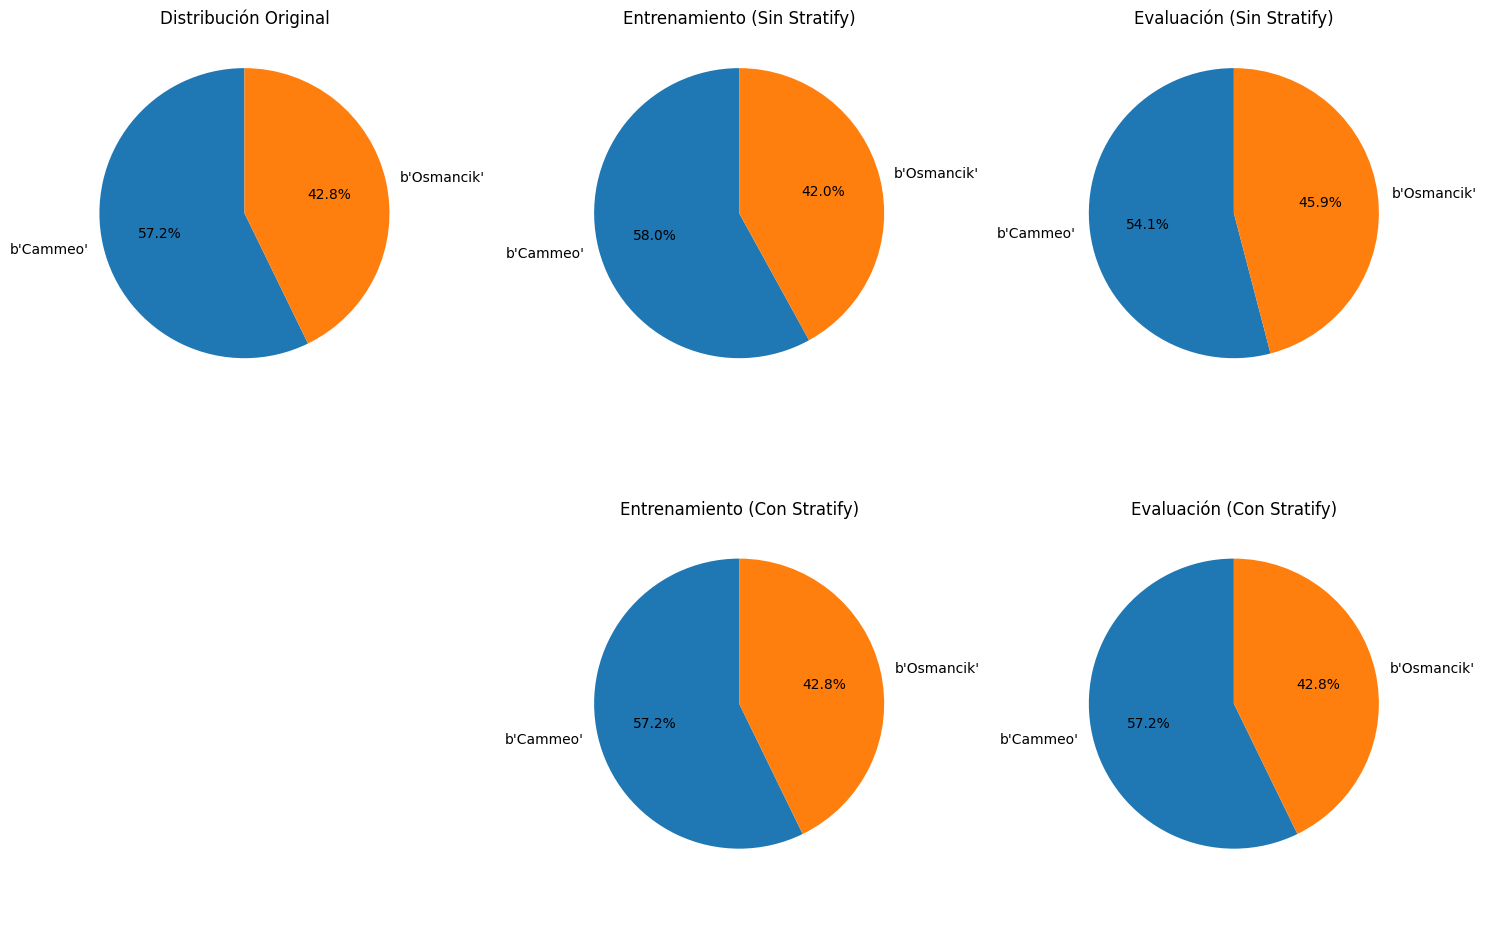


=== ANÁLISIS DEL PARÁMETRO STRATIFY ===

Sin estratificar:
Entrenamiento - Clase 0: 1280 (0.420)
Entrenamiento - Clase 1: 1768 (0.580)
Evaluación - Clase 0: 350 (0.459)
Evaluación - Clase 1: 412 (0.541)

Con estratificar:
Entrenamiento - Clase 0: 1304 (0.428)
Entrenamiento - Clase 1: 1744 (0.572)
Evaluación - Clase 0: 326 (0.428)
Evaluación - Clase 1: 436 (0.572)

¿Qué hace el parámetro stratify?
El parámetro 'stratify' en train_test_split asegura que la proporción de clases en los conjuntos de entrenamiento y prueba sea la misma que en el conjunto original. Es decir, realiza una división estratificada, manteniendo la distribución de las clases.

¿Es necesario estratificar en nuestros datos?
Sí, porque mantiene la proporción original de clases en ambos conjuntos,
lo que es importante para obtener estimaciones más confiables del rendimiento del modelo.


In [33]:
# Vamos a realizar los pasos solicitados para cargar el dataset, transformar las etiquetas con LabelEncoder,
# y dividirlo en conjunto de entrenamiento y evaluación. Además, investigaremos el efecto del parámetro stratify.

# Primero, veamos la distribución original de las clases
print("Distribución original de clases:")
print(df['Class'].value_counts())
print("Proporción de clases:")
print(df['Class'].value_counts(normalize=True))

# Transformar las etiquetas con LabelEncoder
le = LabelEncoder()
df['Class_encoded'] = le.fit_transform(df['Class'])

# Separar características y etiquetas
X = df.drop(['Class', 'Class_encoded'], axis=1)
y = df['Class_encoded']

# División sin estratificar
X_train_no_strat, X_test_no_strat, y_train_no_strat, y_test_no_strat = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=None)

# División con estratificación
X_train_strat, X_test_strat, y_train_strat, y_test_strat = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y)

# Crear gráficos para comparar el efecto del parámetro stratify
fig, axes = plt.subplots(2, 3, figsize=(15, 10))

# Distribución original
axes[0,0].pie(df['Class'].value_counts(), labels=le.classes_, autopct='%1.1f%%', startangle=90)
axes[0,0].set_title('Distribución Original')

# Sin estratificar - entrenamiento
axes[0,1].pie(pd.Series(y_train_no_strat).value_counts(), labels=le.classes_, autopct='%1.1f%%', startangle=90)
axes[0,1].set_title('Entrenamiento (Sin Stratify)')

# Sin estratificar - evaluación
axes[0,2].pie(pd.Series(y_test_no_strat).value_counts(), labels=le.classes_, autopct='%1.1f%%', startangle=90)
axes[0,2].set_title('Evaluación (Sin Stratify)')

# Con estratificar - entrenamiento
axes[1,1].pie(pd.Series(y_train_strat).value_counts(), labels=le.classes_, autopct='%1.1f%%', startangle=90)
axes[1,1].set_title('Entrenamiento (Con Stratify)')

# Con estratificar - evaluación
axes[1,2].pie(pd.Series(y_test_strat).value_counts(), labels=le.classes_, autopct='%1.1f%%', startangle=90)
axes[1,2].set_title('Evaluación (Con Stratify)')

# Ocultar el subplot vacío
axes[1,0].axis('off')

plt.tight_layout()
plt.show()

# Imprimir estadísticas para análisis
print("\n=== ANÁLISIS DEL PARÁMETRO STRATIFY ===")
print("\nSin estratificar:")
print(f"Entrenamiento - Clase 0: {(y_train_no_strat == 0).sum()} ({(y_train_no_strat == 0).mean():.3f})")
print(f"Entrenamiento - Clase 1: {(y_train_no_strat == 1).sum()} ({(y_train_no_strat == 1).mean():.3f})")
print(f"Evaluación - Clase 0: {(y_test_no_strat == 0).sum()} ({(y_test_no_strat == 0).mean():.3f})")
print(f"Evaluación - Clase 1: {(y_test_no_strat == 1).sum()} ({(y_test_no_strat == 1).mean():.3f})")

print("\nCon estratificar:")
print(f"Entrenamiento - Clase 0: {(y_train_strat == 0).sum()} ({(y_train_strat == 0).mean():.3f})")
print(f"Entrenamiento - Clase 1: {(y_train_strat == 1).sum()} ({(y_train_strat == 1).mean():.3f})")
print(f"Evaluación - Clase 0: {(y_test_strat == 0).sum()} ({(y_test_strat == 0).mean():.3f})")
print(f"Evaluación - Clase 1: {(y_test_strat == 1).sum()} ({(y_test_strat == 1).mean():.3f})")

# ¿Qué hace el parámetro stratify?
print("\n¿Qué hace el parámetro stratify?")
print("El parámetro 'stratify' en train_test_split asegura que la proporción de clases en los conjuntos de entrenamiento y prueba sea la misma que en el conjunto original. Es decir, realiza una división estratificada, manteniendo la distribución de las clases.")

# Usar la división estratificada para el resto del análisis
X_train, X_test, y_train, y_test = X_train_strat, X_test_strat, y_train_strat, y_test_strat

print(f"\n¿Es necesario estratificar en nuestros datos?")
print(f"Sí, porque mantiene la proporción original de clases en ambos conjuntos,")
print(f"lo que es importante para obtener estimaciones más confiables del rendimiento del modelo.")



2) Elegir un hiperparámetro para cada modelo: regresión logística, SVM y KNN. Para cada modelo definir una grilla para ese hiperparámetro (no tienen porque ser muchos). Elija el mejor valor de dicho hiperparámetro utilizando `Cross Validation` en el conjunto de entrenamiento para `f1-score`. Una vez elegido ese mejor modelo, reentrene el modelo en todo el conjunto de entrenamiento.

*Hint1:* Puede ser de utilidad utilizar la función [GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html).

In [34]:
# Respuesta a la consigna: elegir un hiperparámetro para cada modelo (LogisticRegression, SVC, KNN),
# definir una grilla, buscar el mejor con cross-validation (f1-score), y reentrenar el mejor modelo.

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import f1_score

# Definir los pipelines para cada modelo (incluyendo escalado)
pipe_logreg = Pipeline([
    ('scaler', StandardScaler()),
    ('logreg', LogisticRegression(max_iter=10000))
])
pipe_svm = Pipeline([
    ('scaler', StandardScaler()),
    ('svm', SVC())
])
pipe_knn = Pipeline([
    ('scaler', StandardScaler()),
    ('knn', KNeighborsClassifier())
])

# Definir las grillas de hiperparámetros (uno por modelo)
param_grid_logreg = {
    'logreg__C': [0.1, 1, 10],         # Regularización
    'logreg__penalty': ['l2']          # Solo l2 porque l1 no está soportado por default con lbfgs
}
param_grid_svm = {
    'svm__C': [0.1, 1, 10],            # Regularización
    'svm__kernel': ['linear', 'rbf']   # Tipo de kernel
}
param_grid_knn = {
    'knn__n_neighbors': [3, 5, 7]      # Número de vecinos
}

# Configurar GridSearchCV para cada modelo, usando f1-score y 5-fold CV
grid_logreg = GridSearchCV(pipe_logreg, param_grid_logreg, cv=5, scoring='f1')
grid_svm = GridSearchCV(pipe_svm, param_grid_svm, cv=5, scoring='f1')
grid_knn = GridSearchCV(pipe_knn, param_grid_knn, cv=5, scoring='f1')

# Ajustar los modelos sobre el conjunto de entrenamiento
grid_logreg.fit(X_train, y_train)
grid_svm.fit(X_train, y_train)
grid_knn.fit(X_train, y_train)

# Mostrar los mejores hiperparámetros encontrados
print("Mejores hiperparámetros para Regresión Logística:", grid_logreg.best_params_)
print("Mejores hiperparámetros para SVM:", grid_svm.best_params_)
print("Mejores hiperparámetros para KNN:", grid_knn.best_params_)

# Reentrenar el mejor modelo sobre todo el conjunto de entrenamiento
best_logreg = grid_logreg.best_estimator_
best_svm = grid_svm.best_estimator_
best_knn = grid_knn.best_estimator_

best_logreg.fit(X_train, y_train)
best_svm.fit(X_train, y_train)
best_knn.fit(X_train, y_train)

# Evaluar en el conjunto de test
y_pred_logreg = best_logreg.predict(X_test)
y_pred_svm = best_svm.predict(X_test)
y_pred_knn = best_knn.predict(X_test)

print("F1-Score Logreg:", f1_score(y_test, y_pred_logreg))
print("F1-Score SVM:", f1_score(y_test, y_pred_svm))
print("F1-Score KNN:", f1_score(y_test, y_pred_knn))

Mejores hiperparámetros para Regresión Logística: {'logreg__C': 10, 'logreg__penalty': 'l2'}
Mejores hiperparámetros para SVM: {'svm__C': 10, 'svm__kernel': 'linear'}
Mejores hiperparámetros para KNN: {'knn__n_neighbors': 7}
F1-Score Logreg: 0.9310734463276836
F1-Score SVM: 0.9300225733634312
F1-Score KNN: 0.9300225733634312


3) (*Opcional*) KNN es un modelo que es muy sensible a las escalas diferentes en las features, instancie un [StandardScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html) y transforme las variables para centrarlas y que tengan el mismo desvío (pueden verificarlo usando un `describe` de su `dataframe`), cree un nuevo modelo KNN, elija su mejor valor para k usando de nuevo `f1`.

In [35]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

# Pipeline con StandardScaler y KNN
pipe_knn = Pipeline([
    ('scaler', StandardScaler()),
    ('knn', KNeighborsClassifier())
])

# Grilla de búsqueda para el número de vecinos
param_grid_knn = {'knn__n_neighbors': [3, 5, 7, 9, 11]}

# GridSearchCV usando f1-score y 5-fold cross-validation
grid_knn = GridSearchCV(pipe_knn, param_grid_knn, cv=5, scoring='f1')
grid_knn.fit(X_train, y_train)

print("Mejor valor de K:", grid_knn.best_params_['knn__n_neighbors'])

y_pred_knn = grid_knn.predict(X_test)
print("F1-Score del mejor KNN:", f1_score(y_test, y_pred_knn))


Mejor valor de K: 11
F1-Score del mejor KNN: 0.9237770193401593


In [36]:
# Escalar manualmente para verificar
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_train)

# Convertirlo a dataframe y mostrar las estadísticas
pd.DataFrame(X_scaled, columns=X_train.columns).describe()

,Area,Perimeter,Major_Axis_Length,Minor_Axis_Length,Eccentricity,Convex_Area,Extent
count,3.048000e+03,3.048000e+03,3.048000e+03,3.048000e+03,3.048000e+03,3.048000e+03,3.048000e+03
mean,2.913971e-16,4.062076e-16,4.726461e-16,7.284928e-16,2.628402e-16,1.456986e-16,6.270866e-16
std,1.000164e+00,1.000164e+00,1.000164e+00,1.000164e+00,1.000164e+00,1.000164e+00,1.000164e+00
min,-2.965733e+00,-2.669159e+00,-2.483838e+00,-4.706428e+00,-5.204531e+00,-2.953431e+00,-2.127038e+00
25%,-7.512822e-01,-7.904915e-01,-8.299182e-01,-6.130108e-01,-7.084417e-01,-7.530910e-01,-8.225496e-01
50%,-1.328553e-01,-1.475443e-01,-1.626170e-01,1.830545e-02,1.071735e-01,-1.262335e-01,-2.034658e-01
75%,7.575521e-01,8.360997e-01,8.656760e-01,6.619153e-01,7.578106e-01,7.646084e-01,8.492857e-01
max,3.605757e+00,2.635455e+00,2.869176e+00,3.703526e+00,2.924201e+00,3.456574e+00,2.570102e+00


4) Analizar el `accuracy_score` que se obtiene para los distintos modelos en el conjunto de test. Realizar un grafico en el cual se observen los valores de accuracy y F1 score macro para cada mejor modelo encontrado. ¿Cuál fue el mejor modelo? Compare las matrices de confusiones, ¿qué modelo eligirían si les interesara solo la [precision](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.precision_score.html)?


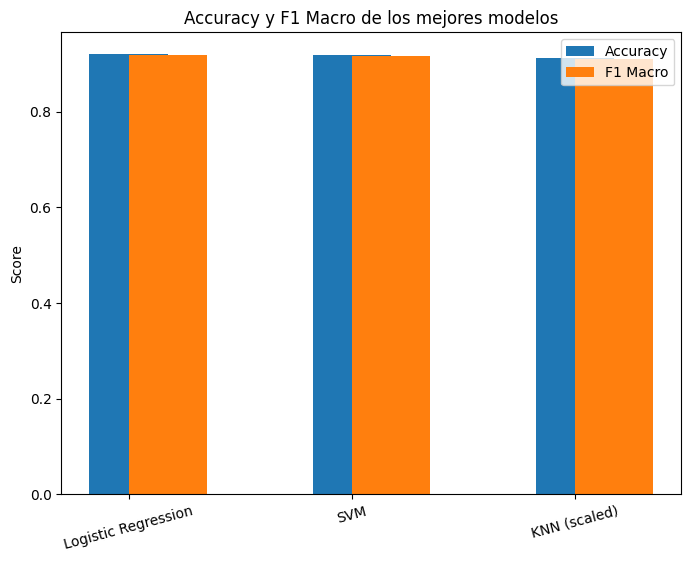

Logistic Regression: Accuracy=0.920, F1 Macro=0.918, Precision Macro=0.920
SVM: Accuracy=0.919, F1 Macro=0.916, Precision Macro=0.919
KNN (scaled): Accuracy=0.912, F1 Macro=0.910, Precision Macro=0.911


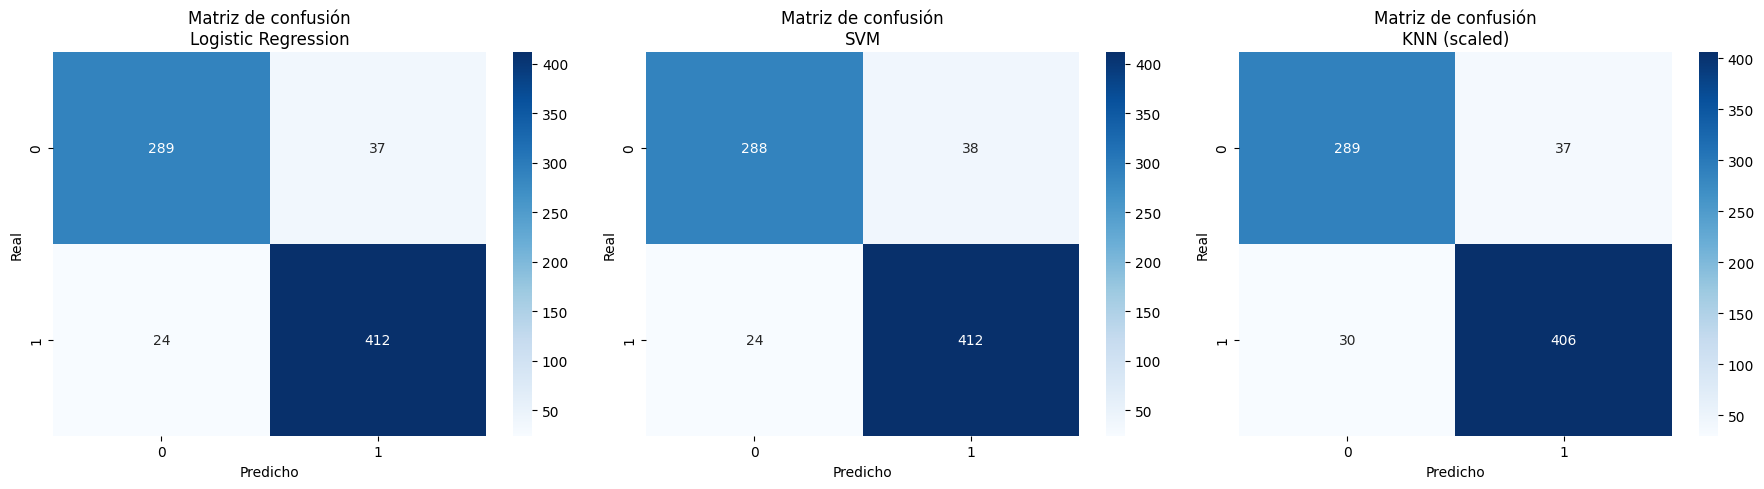

El modelo con mayor precisión macro es: Logistic Regression


In [39]:
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, precision_score
import matplotlib.pyplot as plt
import seaborn as sns

# Suponiendo que ya tienes los modelos entrenados y sus predicciones:
# - y_pred_logreg: predicciones del mejor modelo de regresión logística
# - y_pred_svm: predicciones del mejor modelo SVM
# - y_pred_knn: predicciones del mejor modelo KNN (escalado)
# - y_test: verdaderos valores

# Si no tienes las predicciones, deberías generarlas así:
# y_pred_logreg = best_logreg.predict(X_test)
# y_pred_svm = best_svm.predict(X_test)
# y_pred_knn = grid_knn.predict(X_test)

# Calcular métricas
model_names = ['Logistic Regression', 'SVM', 'KNN (scaled)']
y_preds = [
    best_logreg.predict(X_test),
    best_svm.predict(X_test),
    grid_knn.predict(X_test)
]

accuracies = [accuracy_score(y_test, y_pred) for y_pred in y_preds]
f1_macros = [f1_score(y_test, y_pred, average='macro') for y_pred in y_preds]
precisions = [precision_score(y_test, y_pred, average='macro') for y_pred in y_preds]

# Graficar accuracy y F1 macro
x = range(len(model_names))
plt.figure(figsize=(8,6))
plt.bar(x, accuracies, width=0.35, label='Accuracy', align='center')
plt.bar(x, f1_macros, width=0.35, label='F1 Macro', align='edge')
plt.xticks(x, model_names, rotation=15)
plt.ylabel('Score')
plt.title('Accuracy y F1 Macro de los mejores modelos')
plt.legend()
plt.show()

# Mostrar métricas
for name, acc, f1m, prec in zip(model_names, accuracies, f1_macros, precisions):
    print(f"{name}: Accuracy={acc:.3f}, F1 Macro={f1m:.3f}, Precision Macro={prec:.3f}")

# Matrices de confusión
fig, axes = plt.subplots(1, 3, figsize=(18,5))
for i, (name, y_pred) in enumerate(zip(model_names, y_preds)):
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', ax=axes[i], cmap='Blues')
    axes[i].set_title(f'Matriz de confusión\n{name}')
    axes[i].set_xlabel('Predicho')
    axes[i].set_ylabel('Real')
plt.tight_layout()
plt.show()

# Elegir modelo por precisión
best_precision_idx = precisions.index(max(precisions))
print(f"El modelo con mayor precisión macro es: {model_names[best_precision_idx]}")
